Attempting a predictive model for determining Click - through rate for advertising dataset.
Reference site: https://thecleverprogrammer.com/2021/01/24/click-through-rate-prediction-with-machine-learning/

In [1]:
import pandas as pd
import matplotlib.pyplot as mp
import numpy as np
import datetime
import seaborn as sb
sb.set()

In [2]:
#Load the dataset
adv_df = pd.read_csv('datasets/Advertising.csv')

In [3]:
#Check for NaNs, Describe the dataset & display top rows
adv_df.info()
adv_df.describe(include = 'all')
adv_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
print(adv_df['Ad Topic Line'].describe())
print('---------------------------------------------')
print(adv_df['Country'].describe())
print('---------------------------------------------')
print(adv_df['City'].describe())
print('---------------------------------------------')
print(adv_df['Timestamp'].describe())


count                                   1000
unique                                  1000
top       Cloned 5thgeneration orchestration
freq                                       1
Name: Ad Topic Line, dtype: object
---------------------------------------------
count       1000
unique       237
top       France
freq           9
Name: Country, dtype: object
---------------------------------------------
count          1000
unique          969
top       Lisamouth
freq              3
Name: City, dtype: object
---------------------------------------------
count                    1000
unique                   1000
top       2016-03-27 00:53:11
freq                        1
Name: Timestamp, dtype: object


We analyze the features to determine which ones can be dropped, since they would be irrelevant & cannot be utilized in the analysis process.
In this case, features with completely unique values are unnecessary ie. Timestamp, Ad Topic Line & City.
The Country feature may also have ambiguity in the dataset, but is kept for experimentations.

In [5]:
adv_df.drop(columns = ['Ad Topic Line', 'City', 'Timestamp'])

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Country,Clicked on Ad
0,68.95,35,61833.90,256.09,0,Tunisia,0
1,80.23,31,68441.85,193.77,1,Nauru,0
2,69.47,26,59785.94,236.50,0,San Marino,0
3,74.15,29,54806.18,245.89,1,Italy,0
4,68.37,35,73889.99,225.58,0,Iceland,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,Lebanon,1
996,51.30,45,67782.17,134.42,1,Bosnia and Herzegovina,1
997,51.63,51,42415.72,120.37,1,Mongolia,1
998,55.55,19,41920.79,187.95,0,Guatemala,0


The 'Clicked on Ad' feature is the variable to be determined by the model

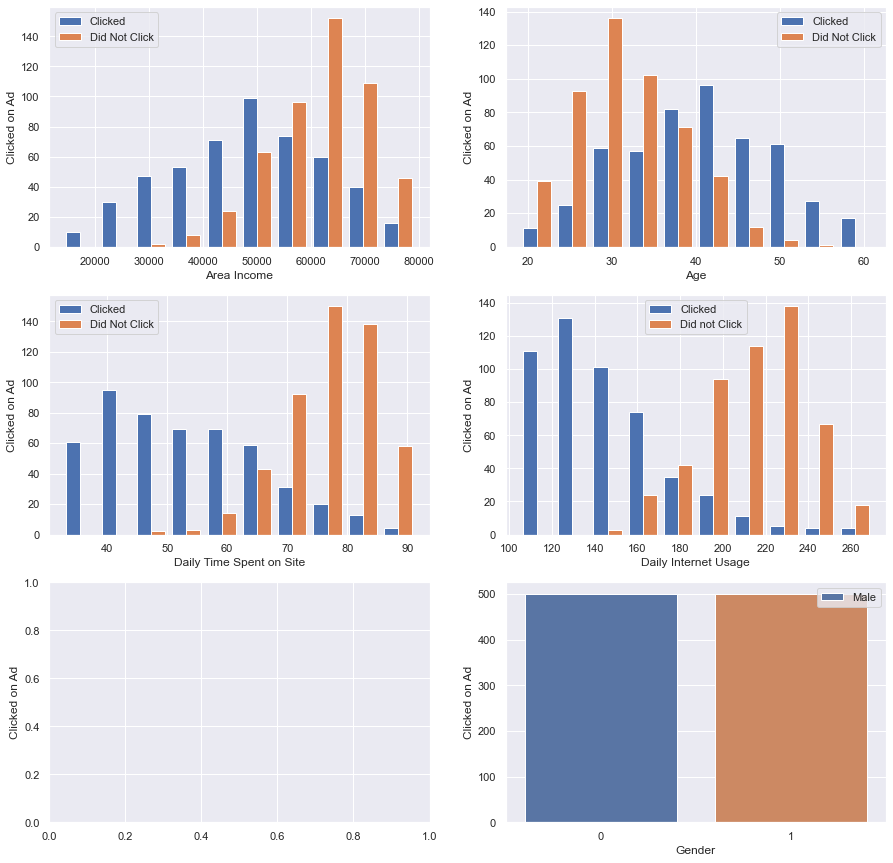

In [6]:
#create subplots of features against variable to be determined 
fig, ax = mp.subplots(3,2, figsize = (15,15))

#Plot histogram of 'Clicked on Ad' against Area of Income 
ax[0,0].hist((adv_df[adv_df['Clicked on Ad'] == 1]['Area Income'] ,
            adv_df[adv_df['Clicked on Ad'] == 0]['Area Income']),
            bins = 10,
            edgecolor = 'white')
ax[0,0].set(xlabel = 'Area Income', ylabel = 'Clicked on Ad')
ax[0,0].legend(('Clicked','Did Not Click'))

#Plot histogram of 'Clicked on Ad' against Age 
ax[0,1].hist((adv_df[adv_df['Clicked on Ad'] == 1]['Age'],
            adv_df[adv_df['Clicked on Ad'] == 0]['Age']),
            bins = 10,
            edgecolor = 'white')
ax[0,1].set(xlabel = 'Age')
ax[0,1].legend(('Clicked', 'Did Not Click'))

#Plot histogram of 'Clicked on Ad' against Daily Time Spent on Site 
ax[1,0].hist((adv_df[adv_df['Clicked on Ad'] == 1]['Daily Time Spent on Site'],
            adv_df[adv_df['Clicked on Ad'] == 0]['Daily Time Spent on Site']),
            bins = 10,
            edgecolor = 'white')
ax[1,0].set(xlabel = "Daily Time Spent on Site")
ax[1,0].legend(('Clicked', 'Did Not Click'))

#Plot histogram of 'Clicked on Ad' against Daily Internet Usage 
ax[1,1].hist((adv_df[adv_df['Clicked on Ad'] == 1]['Daily Internet Usage'], 
            adv_df[adv_df['Clicked on Ad'] == 0]['Daily Internet Usage']), 
            bins = 10, 
            edgecolor = 'white')
ax[1,1].set(xlabel = 'Daily Internet Usage')
ax[1,1].legend(('Clicked', 'Did not Click'))

#Plot histogram of 'Clicked on Ad' against Gender 
sb.countplot(ax = ax[2,1], x = adv_df['Clicked on Ad'], data = adv_df['Male'],)
ax[2,1].set(xlabel = "Gender")
ax[2,1].legend(('Male', 'Female'))

for ax in ax.flat:
    # print('-------------------')
    ax.set(ylabel = 'Clicked on Ad')


The 'Daily Time Spent on Site' & 'Daily Internet Usage' show high correlation on the persons who clicked on the ad.
The 'Area Income' & 'Age' show some correlation as well. 'Gender' does not offer any variations on whether the person clicked the ad or not.

The modelling scheme is for Classification. Selections include a LinearRegressionClassifier, RandomForestTreeClassifier.

In [7]:
#import scikit modules
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

# Declare feature cells & variable to be predicted
X = adv_df[['Age','Daily Internet Usage','Daily Time Spent on Site', 'Area Income']]
y = adv_df['Clicked on Ad']

#Split data into training and testing
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)

#Initialize model
prediction_model = RandomForestClassifier(warm_start=True)

#Fit Model
prediction_model.fit(train_X, train_y)

#Test Model
predicted_values = prediction_model.predict(val_X)

#Determine error Margin
mean_absolute_error(predicted_values, val_y)



0.04

Model has an error of 4%, which can be taken to be quite reliable. Next procedure is to pickle the data for application in the Flask App

In [8]:
import pickle

pickle.dump(prediction_model, open('adv_pred_model.pkl','wb'))

In [9]:
adv_df[['Daily Time Spent on Site','Male']].groupby('Male').describe()

Daily Time Spent on Site                                             \
                        count       mean        std    min    25%    50%   
Male                                                                       
0                       519.0  65.289287  15.623040  32.60  51.57  68.88   
1                       481.0  64.688274  16.109163  33.21  50.43  67.64   

                    
        75%    max  
Male                
0     78.45  91.15  
1     78.58  91.43